# Joseph Mullins Grapevine PCA Project

**IMPORTANT NOTE**

The method for performing PCA and inverse PCA is applicable to any higher-dimensional data.  However, data that sorts the 'age' of each leaf on a particular vine into evenly spaced 'bins' is necessary to perform any analysis that occurs after the inverse PCA function is applied.  Also keep in mind that the leaf-shape-plotting function that is defined below works specifially for the dataset used in this project, meaning leaf shape data that is collected in another manner will require modification of the function in order to correctly plot leaf shape.

The first cell is used to import the necessary packages

In [1]:
#Import pandas to read in the data from url
import pandas as pd

#Import numpy so that data may be converted into a numpy array for analysis
import numpy as np

#Import the PCA function from scikitlearn in order to execute PCA
from sklearn.decomposition import PCA

#Import pyplot for creation of figures
import matplotlib.pyplot as plt

In the following cell, the data set will be imported and converted into a numpy array where it can be 'cleaned up' and made usable.  The data is in the form of 21 x and 21 y coordinates that plot out 21 points that form the shape of half of a grapevine leaf.

Take note that no standardization is being applied to the data.  This is due to the fact that the original dataset that was inported had already undergone Procrustes analysis, meaning that the data was already standardized. An easy method of standardization is included in comments in the cell below.

In [3]:
#Grapevine data is loaded from github page in .csv format
url = 'https://raw.githubusercontent.com/DanChitwood/grapevine_shoots/master/Datasets/Procrustes_all.csv'

#Then, the .csv file must be converted into a pandas dataframe
df = pd.read_csv(url)

#In order to perform PCA, the data must be converted into a numpy array
raw_data=pd.DataFrame(df).to_numpy()

#The newly created array contains extraneous data that must be removed in order to perform PCA
raw_data_clean=np.delete(raw_data,[range(0,50)],1)

#Confirm the the 'clean' dataset is of the correct shape (i.e. it should have 8465 rows and 42 columns for this 
#particular dataset)
rows,cols = raw_data_clean.shape
print(rows,cols)

#If the dataset were not standardized, the following two lines would need to be included, and PCA would need to be 
#applied to the standardized data

#from sklearn.preprocessing import StandardScaler
#raw_data_clean = StandardScaler().fit_transform(raw_data_clean)

8465 42


The third cell is where PCA will be applied to the 'clean' dataset.

In [4]:
#Define the PCA function below, using two components (PC1 and PC2)
pca = PCA(n_components=2)

#Now apply the Sklearn pca function with two components to the dataset
PCs = pca.fit_transform(raw_data_clean)

#Finally, convert the PCA data into a pandas dataframe to check that everything looks okay (dataframe should have 
#8465 rows and 2 columns)
PC_data_frame = pd.DataFrame(data = PCs,columns = ['PC 1','PC 2'])
PC_data_frame

,PC 1,PC 2
0,-542.222226,-662.391936
1,-151.159715,-641.724797
2,327.995790,-815.406850
3,-257.454138,-479.014854
4,126.572530,-547.120292
...,...,...
8460,154.600559,118.290168
8461,323.708072,-286.231609
8462,458.396151,-262.931831
8463,733.212312,-170.000152


The purpose of the following cell is to apply the inverse transform function to the dataset of PC1 and PC2 values to get ourselves back to a hypothetical datset of leaf coordinates.

In [5]:
#The inverse transform function is applied very simply thanks to Sklearn
inverse_PCA = pca.inverse_transform(PCs)

Now that a hypothetical dataset of grapvine leaf coordinates has been computed, we can create figures to visualuze our results.

First and formost the PC1 and PC2 values should be plotted against each other.

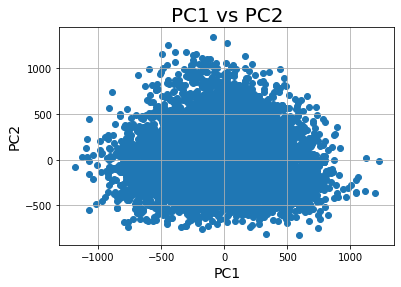

In [20]:
plt.scatter(PCs[:,0],PCs[:,1])
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.title('PC1 vs PC2', fontsize = 20)
plt.grid()

plt.savefig('PC1_vs_PC2.png')

Now that the PCA data has been visualized, we can visualize PC values throughout the growth of the leaves on each grapevine using the 'bin' data from the original dataset.  A 'bin' value of 0.1 indicates the youngest leaf on a vine while a value of '1.0' indicates the oldest.  

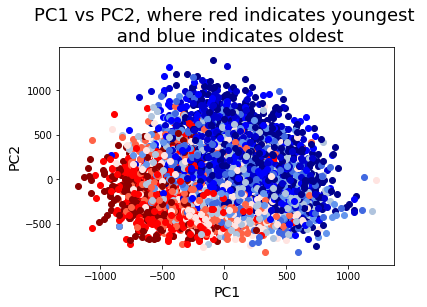

In [21]:
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.title('PC1 vs PC2, where red indicates youngest \n and blue indicates oldest', fontsize = 18)

#The following loop simply plots data points in different colors based off of their 'bin' value
for i in range(len(PCs)):
    if raw_data[i,7] == 0.1:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'darkred')
    elif raw_data[i,7] == 0.2:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'red')
    elif raw_data[i,7] == 0.3:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'tomato')
    elif raw_data[i,7] == 0.4:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'mistyrose')
    elif raw_data[i,7] == 0.5:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'lightsteelblue')
    elif raw_data[i,7] == 0.6:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'cornflowerblue')
    elif raw_data[i,7] == 0.7:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'royalblue')
    elif raw_data[i,7] == 0.8:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'blue')
    elif raw_data[i,7] == 0.9:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'mediumblue')
    elif raw_data[i,7] == 1.0:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'darkblue')
    

plt.savefig('Development_gradient.png')

Now we will average PC1 and PC2 for both the youngest and the oldest leaves, and plot a line between them using polyfit and poly1d in numpy.  This way we can generate a plot that shows the average progression of grapevine leaf shape through development, and can extrapolate leaf shapes that are either younger or older than any of the leaves in the dataset.

In [23]:
#First create empty lists to be populated with PC1 and PC2 values for either young leaves (bin = 0.1) or old leaves (bin = 1.0) 
young_PC1 = []
young_PC2 = []
old_PC1 = []
old_PC2 = []
for i in range(len(PCs)):
    if raw_data[i,7] == 0.1:
        young_PC1.append(PCs[i,0])
        young_PC2.append(PCs[i,1])
    elif raw_data[i,7] == 1.0:
        old_PC1.append(PCs[i,0])
        old_PC2.append(PCs[i,1])  
    else:
        pass

#After the young and old leaves are sorted out, average the four lists in order to create a single 
#average datapoint for each age group
young_PC1_avg = np.mean(young_PC1)
young_PC2_avg = np.mean(young_PC2)
old_PC1_avg = np.mean(old_PC1)
old_PC2_avg = np.mean(old_PC2)

#Create points for each average so that a line may be fitted between them
PC1_points = [young_PC1_avg, old_PC1_avg]
PC2_points = [young_PC2_avg, old_PC2_avg]

#Then, overfit fit a line between the young and old averages using numpy's polyfit and poly1d functions out to 
#±1600 for PC1
coefficients = np.polyfit(PC1_points,PC2_points,1)
line = np.poly1d(coefficients)
x_axis = np.linspace(-1600,1600,100)
y_axis = line(x_axis)

Now that a line between the two average points has been computed, we can calculate PC1 and PC2 values for ten evenly spaced timepoints along the line.  Keep in mind that these points do not necessarily exist, however points three through eight are within the bounds of the actual PCA data that was computed.

After PC1 and PC2 values are calculated for each timepoint are calculated, the inverse PCA function from before can be applied and hypothetical leave shape data can be generated.

In [26]:
#Create two empty lists to be filled with PC1 and PC2 values, respectively, for each of the ten timepoints
pca_list_x = []
pca_list_y = []

#Below is a loop that populates pca_list_x starting at -1600 and populates pca_list_y according to the 
#poly1d function that was previously computed
x_pca = -1600
for i in range(10):
    y_pca = line(x_pca)
    pca_list_x.append(x_pca)
    pca_list_y.append(y_pca)

    x_pca += 320

#Create one usable of PC1 and PC2 values
pca_array = np.column_stack((pca_list_x, pca_list_y))

#Apply the inverse transform function to the newly generated array to come up with a list of hypothetical leaf
#shape data along the line of development
inv_new = pca.inverse_transform(pca_array)

Then, another figure is generated that shows the color gradient plot from before and adds the poly1d line, as well as the average values for the young and old timepoints and the positions of the ten computed timepoints.

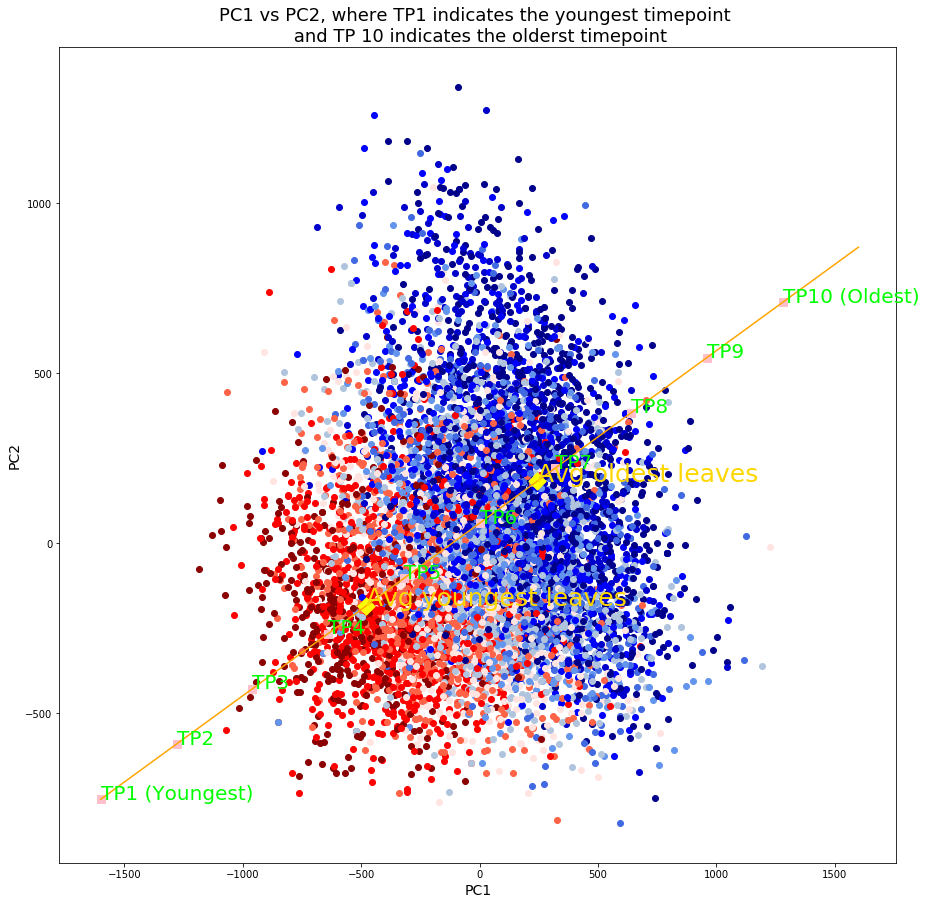

In [27]:
plt.figure(figsize = (15,15))
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.title('PC1 vs PC2, where TP1 indicates the youngest timepoint \n and TP 10 indicates the olderst timepoint', fontsize = 18)

#Plots color gradient of real PC values, as before
for i in range(len(PCs)):
    if raw_data[i,7] == 0.1:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'darkred')
    elif raw_data[i,7] == 0.2:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'red')
    elif raw_data[i,7] == 0.3:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'tomato')
    elif raw_data[i,7] == 0.4:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'mistyrose')
    elif raw_data[i,7] == 0.5:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'lightsteelblue')
    elif raw_data[i,7] == 0.6:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'cornflowerblue')
    elif raw_data[i,7] == 0.7:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'royalblue')
    elif raw_data[i,7] == 0.8:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'blue')
    elif raw_data[i,7] == 0.9:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'mediumblue')
    elif raw_data[i,7] == 1.0:
        plt.scatter(PCs[i,0], PCs[i,1], color = 'darkblue')

#Plots and labels the two average points for the young and old leaves
plt.scatter(young_PC1_avg,young_PC2_avg, color = 'yellow', marker = 'D', s = 150)
plt.text(young_PC1_avg,young_PC2_avg, 'Avg youngest leaves', color = 'gold', fontsize = 25)
plt.scatter(old_PC1_avg,old_PC2_avg, color = 'yellow', marker = 'D', s = 150)   
plt.text(old_PC1_avg,old_PC2_avg, 'Avg oldest leaves', color = 'gold', fontsize = 25)

#Plots and labels each of the ten timepoints (TP1 [youngest] - TP2 [oldest]) 
plt.scatter(pca_array[0,0],pca_array[0,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[0,0], pca_array[0,1], 'TP1 (Youngest)', color = 'lime', fontsize = 20)
plt.scatter(pca_array[1,0],pca_array[1,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[1,0], pca_array[1,1], 'TP2', color = 'lime', fontsize = 20)
plt.scatter(pca_array[2,0],pca_array[2,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[2,0], pca_array[2,1], 'TP3', color = 'lime', fontsize = 20)
plt.scatter(pca_array[3,0],pca_array[3,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[3,0], pca_array[3,1], 'TP4', color = 'lime', fontsize = 20)
plt.scatter(pca_array[4,0],pca_array[4,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[4,0], pca_array[4,1], 'TP5', color = 'lime', fontsize = 20)
plt.scatter(pca_array[5,0],pca_array[5,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[5,0], pca_array[5,1], 'TP6', color = 'lime', fontsize = 20)
plt.scatter(pca_array[6,0],pca_array[6,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[6,0], pca_array[6,1], 'TP7', color = 'lime', fontsize = 20)
plt.scatter(pca_array[7,0],pca_array[7,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[7,0], pca_array[7,1], 'TP8', color = 'lime', fontsize = 20)
plt.scatter(pca_array[8,0],pca_array[8,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[8,0], pca_array[8,1], 'TP9', color = 'lime', fontsize = 20)
plt.scatter(pca_array[9,0],pca_array[9,1], marker = 's', color = 'pink', s = 75)
plt.text(pca_array[9,0], pca_array[9,1], 'TP10 (Oldest)', color = 'lime', fontsize = 20)

plt.plot(x_axis,y_axis, color = 'orange')

plt.savefig('Development_full_fig.png')

After the hypothetical leaf shape data along the line of development that we generated has been obtained and plotted, we can use the inverse PCA data that we generated from these points in order to plot out the shape of our hypothetical leaves.  In order to plot these leaves, a function must be defined that plots out the 21 points in the correct order so that the edge of each leaf as well as it's distal vein, proximal vein and midvein can be visualized.

It is important to note that this function only applies to this specific dataset, or data that is plotted in the exact same order and in the exact same locations for another dataset of leaves.  Another fucntion would have to be written in order to plot the shape of leaves in which data was collected in any other manner.

In [28]:
def shape_plot(values, col, color, figsize):
    
    plt.figure(figsize = (figsize,figsize))
    
    #First plot the edges of the leaf
    
    plt.plot([values[col,26],values[col,28]],[values[col,27],values[col,29]], color = color)
    plt.plot([values[col,28],values[col,30]],[values[col,29],values[col,31]], color = color)
    plt.plot([values[col,30],values[col,32]],[values[col,31],values[col,33]], color = color)
    plt.plot([values[col,32],values[col,34]],[values[col,33],values[col,35]], color = color)
    plt.plot([values[col,34],values[col,36]],[values[col,35],values[col,37]], color = color)
    plt.plot([values[col,36],values[col,38]],[values[col,37],values[col,39]], color = color)
    plt.plot([values[col,38],values[col,40]],[values[col,39],values[col,41]], color = color)
    
    #Then plot the veins in a similar fashion
    
    plt.plot([values[col,0],values[col,10]],[values[col,1],values[col,11]], color = color)
    plt.plot([values[col,10],values[col,26]],[values[col,11],values[col,27]], color = color)
    plt.plot([values[col,26],values[col,8]],[values[col,27],values[col,9]], color = color)
    plt.plot([values[col,8],values[col,28]],[values[col,9],values[col,29]], color = color)
    plt.plot([values[col,28],values[col,12]],[values[col,29],values[col,13]], color = color)
    plt.plot([values[col,12],values[col,2]],[values[col,13],values[col,3]], color = color)
    plt.plot([values[col,2],values[col,16]],[values[col,3],values[col,17]], color = color)
    plt.plot([values[col,16],values[col,32]],[values[col,17],values[col,33]], color = color)
    plt.plot([values[col,32],values[col,14]],[values[col,33],values[col,15]], color = color)
    plt.plot([values[col,14],values[col,34]],[values[col,15],values[col,35]], color = color)
    plt.plot([values[col,34],values[col,18]],[values[col,35],values[col,19]], color = color)
    plt.plot([values[col,18],values[col,4]],[values[col,19],values[col,5]], color = color)
    plt.plot([values[col,4],values[col,22]],[values[col,5],values[col,23]], color = color)
    plt.plot([values[col,22],values[col,38]],[values[col,23],values[col,39]], color = color)
    plt.plot([values[col,38],values[col,20]],[values[col,39],values[col,21]], color = color)
    plt.plot([values[col,20],values[col,40]],[values[col,21],values[col,41]], color = color)
    plt.plot([values[col,40],values[col,24]],[values[col,41],values[col,25]], color = color)
    plt.plot([values[col,24],values[col,6]],[values[col,25],values[col,7]], color = color)

Now that this plotting function has been defined, we can finally plot the shape of our ten leaves.  The top plot represents the youngest leaf and the bottom represents the oldest.  Red plots indicate shapes that are outside of the bounds of the PC values for the original dataset, and green values represent shapes that are within these bounds.

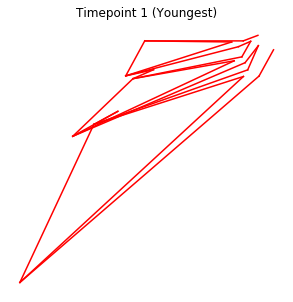

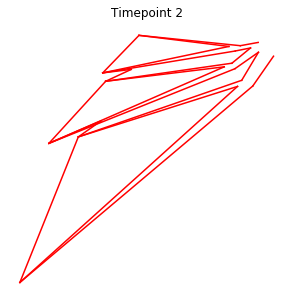

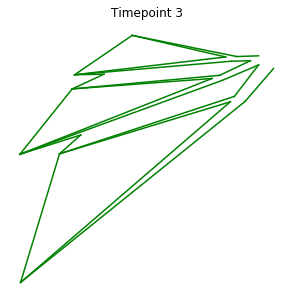

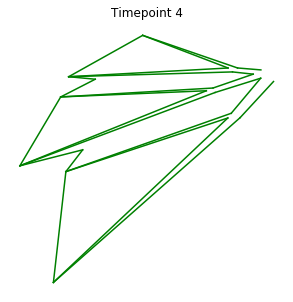

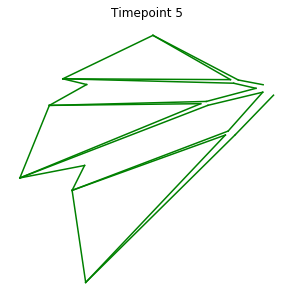

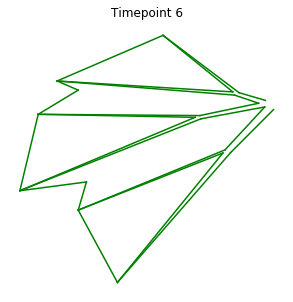

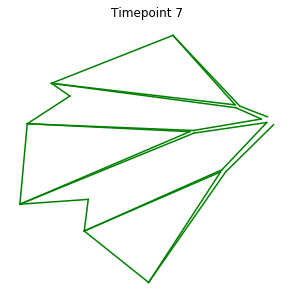

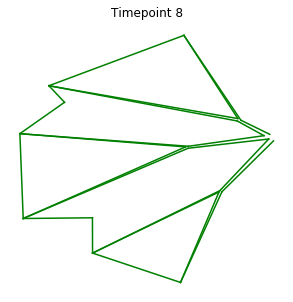

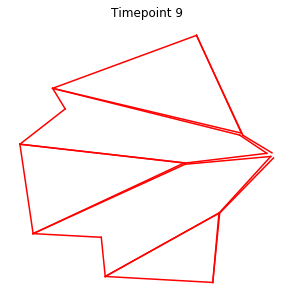

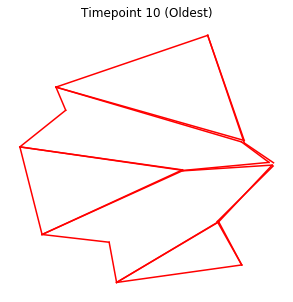

In [39]:
#First, define a list of colors and labels for the plots of each leaf
color_list = ['red', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red']
label_list = ['Timepoint 1 (Youngest)', 'Timepoint 2', 'Timepoint 3', 'Timepoint 4', 'Timepoint 5', 'Timepoint 6', 'Timepoint 7', 'Timepoint 8', 'Timepoint 9', 'Timepoint 10 (Oldest)', ]

#Then, simply plot all ten timepoints using the shape_plot function
for i in range(10):
    shape_plot(inv_new, i, color_list[i], figsize = 5)
    plt.title(label_list[i])
    plt.axis('off')
    
    #Thw following line simply saves each individual timepoint plot
    plt.savefig('Timepoint'+str(i+1)+'.png')